# SciPy

* http://www.scipy-lectures.org/
* 科学技術計算ライブラリ
* 別途インストールが必要（Anaconda には同梱済み）
* http://www.turbare.net/transl/scipy-lecture-notes/ （日本語）

## 線形代数

In [5]:
import numpy as np
import scipy.linalg

### 行列の作成

In [6]:
m = np.matrix([[1, 7, 3], [9, 2, 6], [5, 8, 4]])
m

matrix([[1, 7, 3],
        [9, 2, 6],
        [5, 8, 4]])

### 行列積

In [7]:
m.dot(m)

matrix([[ 79,  45,  57],
        [ 57, 115,  63],
        [ 97,  83,  79]])

### 逆行列

In [8]:
m_inv = scipy.linalg.inv(m)
m_inv

array([[-0.38461538, -0.03846154,  0.34615385],
       [-0.05769231, -0.10576923,  0.20192308],
       [ 0.59615385,  0.25961538, -0.58653846]])

In [9]:
m.dot(m_inv)

matrix([[  1.00000000e+00,  -2.22044605e-16,   0.00000000e+00],
        [  0.00000000e+00,   1.00000000e+00,  -4.44089210e-16],
        [  0.00000000e+00,  -2.22044605e-16,   1.00000000e+00]])

### 固有値・固有ベクトル

In [10]:
w, v = scipy.linalg.eig(m)

In [11]:
w

array([ 14.95445115+0.j,  -6.95445115+0.j,  -1.00000000+0.j])

In [12]:
v

array([[-0.44738344, -0.561615  , -0.48852715],
       [-0.61260501,  0.76902301, -0.2220578 ],
       [-0.65158511, -0.30527399,  0.84381962]])

In [13]:
w[0] * v[:,0]

array([-6.69037384+0.j, -9.16117168+0.j, -9.74409773+0.j])

In [14]:
m.dot(v[:,0])

matrix([[-6.69037384, -9.16117168, -9.74409773]])

### 連立方程式の解

$$
x + 7y + 3z = 11 \\
9x + 2y + 6z = 0 \\
5x + 8y + 4z = 18
$$

In [15]:
b = np.array([11, 0, 18])
sol = scipy.linalg.solve(m, b)
sol

array([ 2.,  3., -4.])

In [16]:
m.dot(sol)

matrix([[  1.10000000e+01,  -8.88178420e-16,   1.80000000e+01]])

## 数値積分

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [174]:
def show_graph(f, a, b, n = 1000):
    xs = np.linspace(a, b, n)
    plt.figure(figsize=(4, 4), dpi=96, facecolor='white')
    ys = f(xs)
    plt.plot(xs, ys)
    plt.xlim(a, b)
    plt.ylim(np.floor(min(ys)), np.ceil(max(ys)))
    plt.xlabel('x')
    plt.ylabel('f(x)')

0.7853981633974481 8.833911380179416e-11


3.1415926535897922

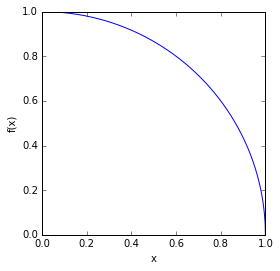

In [253]:
import scipy.integrate

def f(x):
    return np.sqrt(1 - x ** 2)

show_graph(f, 0, 1)
result, delta = scipy.integrate.quad(f, 0, 1)
print(result, delta)
result * 4

1.7724538509055159 1.4202636780944923e-08


3.1415926535897927

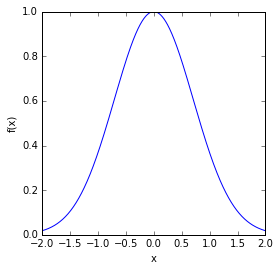

In [177]:
def g(x):
    return np.exp(-x ** 2)

show_graph(g, -2, 2)
result, delta = scipy.integrate.quad(g, -np.inf, np.inf)
print(result, delta)
result ** 2

## 常微分方程式

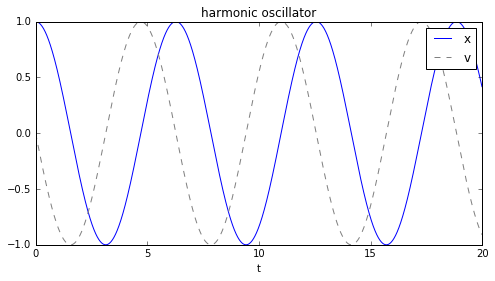

In [12]:
import scipy.integrate

k = 1
def f(vec, time):
    x, v = vec
    return (v, -k * x)
    
arange = np.arange(0.0, 20.0, 0.01)
coords = np.zeros((2, len(arange)))
state0 = np.array([1.0, 0.0])
for i, state in enumerate(scipy.integrate.odeint(f, state0, arange)):
    coords[:, i] = state

fig = plt.figure(figsize=(8, 4), dpi=96, facecolor='white')
ax = fig.add_subplot(111)
ax.plot(arange, coords[0], '-', color='blue', label='x')
ax.plot(arange, coords[1], '--', color='gray', label='v')

ax.set_title('harmonic oscillator')
ax.set_xlim(arange[0], arange[-1])
ax.set_ylim(-1.0, 1.0)
ax.set_xlabel('t')
ax.legend(loc='upper right')
    
plt.show()

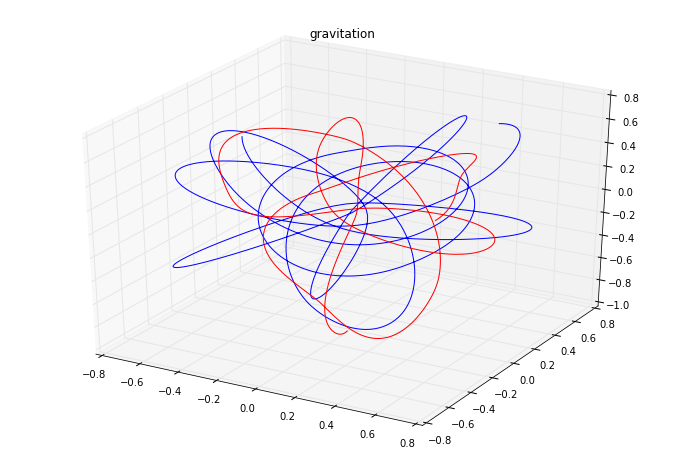

In [224]:
import scipy.integrate

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8), dpi=96, facecolor='white')
ax = fig.add_subplot(111, projection='3d')

def force(x1, x2):
    r = x1 - x2
    return -(scipy.linalg.norm(r) ** -2) * r

origin = np.zeros(3)
def system(vec, time):
    x1, v1, x2, v2 = vec[:3], vec[3:6], vec[6:9], vec[9:]
    result = np.array([v1, 5 * force(x1, origin) + 1 * force(x1, x2),
                       v2, 1 * force(x2, origin) + 1 * force(x2, x1)]).flatten()
    return result

def plot(state0):
    arange = np.arange(0.0, 10.0, 0.01)
    coords = np.zeros((12, len(arange)))
    for i, state in enumerate(scipy.integrate.odeint(system, state0, arange)):
        coords[:, i] = state
    ax.plot(coords[0], coords[1], coords[2], '-', color='blue')
    ax.plot(coords[6], coords[7], coords[8], '-', color='red')

plot(np.random.rand(12))
ax.set_title('gravitation')
    
plt.show()

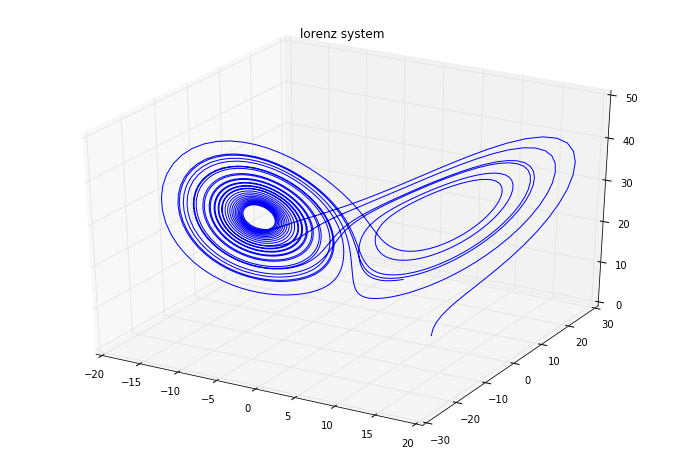

In [216]:
from mpl_toolkits.mplot3d import Axes3D

p, r, b = 10.0, 28.0, 8.0 / 3.0
def lorenz_system(vec, time):
    x, y, z = vec
    return np.array([p * (y - x), r * x - y - x * z, x * y - b * z])

arange = np.arange(0.0, 25.0, 0.01)
coords = np.zeros((3, len(arange)))
state0 = np.array([10.0, 1.0, 1.0])
for i, state in enumerate(scipy.integrate.odeint(lorenz_system, state0, arange)):
    coords[:, i] = state

fig = plt.figure(figsize=(12, 8), dpi=96, facecolor='white')
ax = fig.add_subplot(111, projection='3d')
ax.plot(coords[0], coords[1], coords[2], '-', color='blue')
ax.set_title('lorenz system')

plt.show()

## 高速フーリエ変換

### FFT

In [6]:
import scipy.fftpack

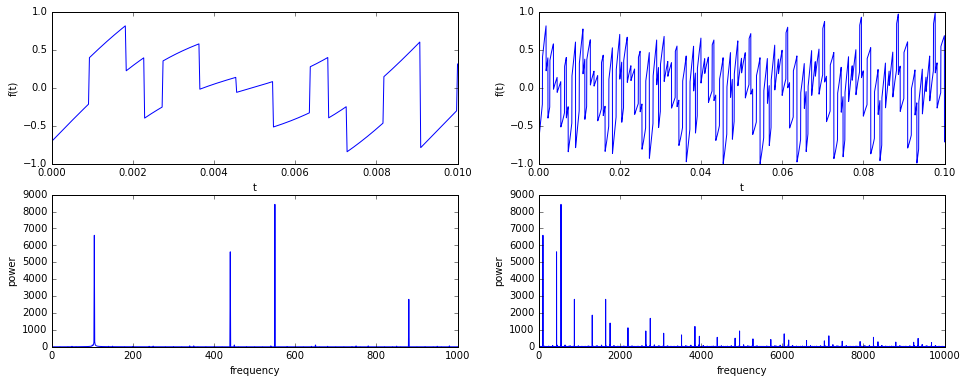

In [7]:
def saw(x):
    return (x - x // 1) * 2 - 1

def square(x):
    return (((x + 0.5) // 1 - x // 1) - 0.5) * 2

def f(x, freq):
    timbre = [(saw, 1, 0.4), (square, 1.25, 0.3), (np.sin, 1.5, 0.3)]
    return sum(w * f(a * freq * x) for (f, a, w) in timbre)

d = 1 / 44100
xs = np.arange(0, 1, d)
ys = f(xs, 440)

sample_freq = scipy.fftpack.fftfreq(ys.size, d=d)
sig_fft = scipy.fftpack.fft(ys)

pidxs = np.where(sample_freq > 0)
freqs, power = sample_freq[pidxs], np.abs(sig_fft)[pidxs]

fig = plt.figure(figsize=(16, 6), dpi=96, facecolor='white')

ax = fig.add_subplot(2, 2, 1)
ax.plot(xs, ys)
ax.set_xlim(0, 0.01)
ax.set_xlabel('t')
ax.set_ylabel('f(t)')

ax = fig.add_subplot(2, 2, 2)
ax.plot(xs, ys)
ax.set_xlim(0, 0.1)
ax.set_xlabel('t')
ax.set_ylabel('f(t)')

ax = fig.add_subplot(2, 2, 3)
ax.plot(freqs, power)
ax.set_xlim(0, 1000)
ax.set_xlabel('frequency')
ax.set_ylabel('power')

ax = fig.add_subplot(2, 2, 4)
ax.plot(freqs, power)
ax.set_xlim(0, 10000)
ax.set_xlabel('frequency')
ax.set_ylabel('power')

plt.show()

### IFFT

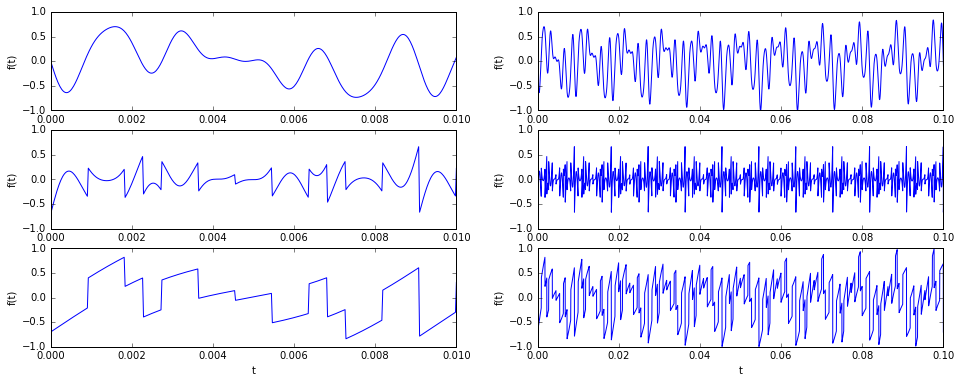

In [11]:
filter_freq = 1000

# low-pass filter

lowpass_fft = np.array(sig_fft)
lowpass_fft[np.where(np.abs(sample_freq) >= filter_freq)] = 0
lowpass = np.real(scipy.fftpack.ifft(lowpass_fft, xs.size))

# high-pass filter

highpass_fft = np.array(sig_fft)
highpass_fft[np.where(np.abs(sample_freq) < filter_freq)] = 0
highpass = np.real(scipy.fftpack.ifft(highpass_fft, xs.size))

new_ys = lowpass + highpass

# plot

def plot_ax(ax, ys, xlim):
    ax.plot(xs, ys)
    ax.set_xlim(0, xlim)
    ax.set_ylim(-1, 1)
    ax.set_xlabel('t')
    ax.set_ylabel('f(t)')

fig = plt.figure(figsize=(16, 6), dpi=96, facecolor='white')

ax = fig.add_subplot(3, 2, 1)
plot_ax(ax, lowpass, 0.01)
ax = fig.add_subplot(3, 2, 2)
plot_ax(ax, lowpass, 0.1)
ax = fig.add_subplot(3, 2, 3)
plot_ax(ax, highpass, 0.01)
ax = fig.add_subplot(3, 2, 4)
plot_ax(ax, highpass, 0.1)
ax = fig.add_subplot(3, 2, 5)
plot_ax(ax, new_ys, 0.01)
ax = fig.add_subplot(3, 2, 6)
plot_ax(ax, new_ys, 0.1)
plt.show()